# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
%matplotlib inline

In [2]:
!pip install tweepy

In [3]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file: 
    file.write(response.content)
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#I do not wish to create a developer account with Twitter. 
#I am using the alternative uploaded JSON text file provided by Udacity per the instructions.

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [7]:
tweets = []
tweet_json = open('tweet-json.txt', "r")
for line in tweet_json: 
    try:
        tweet =  json.loads(line)
        tweets.append(tweet)
    except:
        continue

tweet_json.close()

df_tweets = pd.DataFrame()
df_tweets['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets))
df_tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))
df_tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing Data


### Archive

In [9]:
#Visually assess the archive file provided
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
#View the data types of each column
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#View data type of the timestamp column, specifically
type(df_archive.timestamp[0])

str

In [12]:
#View number of rows with null values in each column
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
#View count of duplicated rows
df_archive.duplicated().sum()

0

In [14]:
#View count of unique tweet_ids
df_archive.tweet_id.nunique()

2356

In [15]:
#View the counts of rating_denominators
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
#View the counts of rating_numerators
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
#View the counts of names
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Toby           7
Daisy          7
Bailey         7
an             7
Dave           6
Jax            6
Milo           6
Scout          6
Jack           6
Rusty          6
Stanley        6
Bella          6
Koda           6
Leo            6
Oscar          6
Gus            5
            ... 
Herb           1
Bert           1
Blu            1
Rhino          1
Anthony        1
Jaycob         1
Robin          1
Bilbo          1
Edmund         1
Damon          1
Barclay        1
Timber         1
Hazel          1
Sandra         1
Ember          1
Olaf           1
Halo           1
Karll          1
Howie          1
Rufio          1
Willow         1
Creg           1
Stormy         1
Cora           1
Dudley         1
Alexander      1
Flurpson       1
Stella        

In [18]:
#Notably, "None" and some lowercase words are included as names. 
#Search for all lowercase words in the names column
df_archive[df_archive['name'].str.contains(r'^[^A-Z].*$')]['name'].value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
mad              2
getting          2
not              2
actually         2
my               1
space            1
light            1
such             1
all              1
unacceptable     1
incredibly       1
his              1
by               1
this             1
life             1
officially       1
infuriating      1
old              1
Name: name, dtype: int64

### Image Predictions

In [19]:
#Visually check the image predictor data set
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
#View the data types of the columns in df_image
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#View the count of null values in each column
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
#View the counts of each unique value in p1 column
df_image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [23]:
#View the counts of each unique value in p2 column
df_image.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
toy_terrier                        20
chow                               20
malinois                           20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [24]:
#View the counts of each unique value in p3 column
df_image.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [25]:
#Check for any confidence predictions >100%
df_image[df_image.p1_conf >= 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [26]:
#Check for any confidence predictions >100%
df_image[df_image.p2_conf >= 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [27]:
#Check for any confidence predictions >100%
df_image[df_image.p3_conf >= 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [28]:
#View counts of dog predictions
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [29]:
#View counts of dog predictions
df_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [30]:
#View counts of dog predictions
df_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [31]:
#View count of number of images 
df_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Twitter API

In [32]:
#Visually check API tweet data
df_tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [33]:
#View data types for each column
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [34]:
#View count of missing values in each column
df_tweets.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [35]:
#View count of duplicated rows
df_tweets.duplicated().sum()

0

In [36]:
#View count of unique tweet_ids
df_tweets.tweet_id.nunique()

2354

### Quality issues
1. All data sources: tweet_id should be string instead of integer. 

2. Archive: The timestamp column data type should be datetime instead of string object.

3. Archive: There are invalid names such as "None," "a," "the," and other lowercase words.

4. Archive: There are 181 retweets.

5. Images: Image prediction values (p1, p2, and p3) are varied in their format (capitalized, lowercase, underscores, etc)

6. Archive: One tweet's denominator is 0. 

7. Images: Many tweets are predicted to not be dogs. 

8. Archive: There are in-reply tweets.

### Tidiness issues
1. These three data sources should be merged. 

2. Archive: There are 4 columns named with the same values of the variables in them. 


## Cleaning Data

In [37]:
# Make copies of original pieces of data
a_clean = df_archive.copy()
i_clean = df_image.copy()
t_clean = df_tweets.copy()

### Issue #1:
 - Merge all data sources.

#### Define:
> Use left join to merge on tweet_id.

#### Code

In [38]:
full_df = a_clean.merge(t_clean, how='left', on='tweet_id')
full_df = full_df.merge(i_clean, how='left', on='tweet_id')
# Create copy of original dataframe.
full_clean = full_df.copy()
full_clean.loc[full_clean['in_reply_to_user_id'].notnull()].shape

(78, 30)

#### Test

In [39]:
full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

### Issue #2:
- tweet_id data type should be string.

#### Define
> Use astype() to convert the tweet_id column data type to string.

#### Code

In [40]:
full_clean.tweet_id = full_clean.tweet_id.astype(str)

#### Test

In [41]:
type(full_clean.tweet_id[0])

str

### Issue #3
- The timestamp data type should be datetime.

#### Define
> Use to_datetime() to convert timestamp column data type to datetime.

#### Code

In [42]:
full_clean['timestamp'] = pd.to_datetime(full_clean['timestamp'])

#### Test

In [43]:
full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count          

### Issue #4
- Some dog names listed are invalid, such as "None," "an," "the," and other lowercase words.

#### Define
> Change cells containing invalid names to NaN.

#### Code

In [44]:
#Replace lowercase words that are not names with NaN
full_clean.loc[full_clean['name'].str.contains(r'^[^A-Z].*$'), 'name'] = np.nan

In [45]:
#Replace "None" names with NaN
full_clean.loc[full_clean['name']=='None', 'name'] = np.nan

#### Test

In [46]:
full_clean.name.value_counts()

Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
Daisy         7
Bailey        7
Buddy         7
Toby          7
Dave          6
Rusty         6
Milo          6
Scout         6
Jack          6
Koda          6
Stanley       6
Jax           6
Bella         6
Oscar         6
Leo           6
Phil          5
Chester       5
Bentley       5
Oakley        5
George        5
             ..
Kawhi         1
Pubert        1
Goliath       1
Batdog        1
Herb          1
Bert          1
Bilbo         1
Rufio         1
Ridley        1
Stella        1
Ole           1
Damon         1
Barclay       1
Timber        1
Hazel         1
Sandra        1
Ember         1
Olaf          1
Halo          1
Karll         1
Edmund        1
Howie         1
Willow        1
Creg          1
Stormy        1
Cora          1
Dudley        1
Alexander     1
Flurpson      1
Stewie        1
Name: name, Length: 931,

### Issue #5
- There are 181 retweets. We only want original tweets.

#### Define
> Remove retweets. Drop rows that contain a value in retweeted_status_id column. Drop retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns after removing rows. 

#### Code

In [47]:
full_clean = full_clean[full_clean['retweeted_status_id'].isnull()]
full_clean.drop(['retweeted_status_id',
                'retweeted_status_user_id',
                'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [48]:
full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf     

### Issue #6
- Image prediction values (p1, p2, and p3) are varied in their format (capitalized, lowercase, underscores, etc)

#### Define
> User lower() to change all characters in p1, p2, and p3 columns to lowercase. 

#### Code

In [49]:
full_clean['p1'] = full_clean['p1'].str.lower()

In [50]:
full_clean['p2'] = full_clean['p2'].str.lower()

In [51]:
full_clean['p3'] = full_clean['p3'].str.lower()

#### Test

In [52]:
full_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,...,1.0,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,1.0,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,...,2.0,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,1.0,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,1.0,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


### Issue #7
- One tweet's denominator is 0. 

#### Define
> Remove this one tweet by dropping this row.

#### Code

In [53]:
#Find the index of the tweet with a rating denominator of 0
full_clean.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#Drop the row at index 313
full_clean.drop(313, inplace=True)

#### Test

In [55]:
full_clean.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8
- Many tweets are predicted to not be dogs. 

#### Define
> Since we only want to analyze tweets about dogs, tweets that are predicted to not be dogs should be removed. Remove rows that do not include at least one true dog prediction in p1, p2, or p3.

#### Code

In [56]:
#Keep only rows which contain at least one dog prediction in p1, p2, or p3.
full_clean = full_clean.query('p1_dog==True | p2_dog==True | p3_dog==True')

#### Test

In [57]:
full_clean.query('p1_dog==False & p2_dog==False & p3_dog==False')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #9
- There are in-reply tweets and non-original, non-rating tweets are unnecessary for analysis.

#### Define
> Keep only rows which do not contain in_reply_to_user_id values. Drop the in_reply_to_status_id and in_reply_to_user_id columns afterwards.

#### Code

In [58]:
#Check for rows containing a value in the 'in_reply_to_user_id' column
full_clean.loc[full_clean['in_reply_to_user_id'].notnull()].shape

(20, 27)

In [59]:
#Keep only rows where 'in_reply_to_user_id' is empty.
full_clean = full_clean[full_clean['in_reply_to_user_id'].isnull()]
#Test removal before dropping columns
full_clean.loc[full_clean['in_reply_to_user_id'].notnull()].shape

(0, 27)

In [60]:
full_clean.drop(['in_reply_to_user_id',
               'in_reply_to_status_id'],
               axis=1, inplace=True)

#### Test

In [61]:
full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 25 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1186 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
retweet_count         1666 non-null float64
favorite_count        1666 non-null float64
jpg_url               1666 non-null object
img_num               1666 non-null float64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-null object
p2_conf               1

### Issue #10
- There are 4 columns containing values as column headers (doggo, floofer, pupper, and puppo) instead of variable names. 

#### Define
> Make a new column that categorizes each tweet with "pupper, doggo, floofer, puppo," or "none." Drop the original 4 columns.

#### Code

In [62]:
full_clean['dog_type'] = full_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)
full_clean.drop(['doggo',
                 'floofer',
                 'pupper',
                 'puppo'],
               axis=1, inplace=True)
full_clean['dog_type'] = full_clean['dog_type'].astype('category')

#### Test

In [63]:
full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 22 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1186 non-null object
retweet_count         1666 non-null float64
favorite_count        1666 non-null float64
jpg_url               1666 non-null object
img_num               1666 non-null float64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-null object
p2_conf               1666 non-null float64
p2_dog                1666 non-null object
p3                    1666 non-null object
p3_conf               1666 non-null float64
p3_dog               

In [64]:
full_clean['dog_type'].value_counts()

pupper     180
doggo       60
puppo       27
floofer      3
Name: dog_type, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
full_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [66]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514.0,33819.0,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,NaN
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328.0,25461.0,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
2,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964.0,42908.0,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
3,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774.0,41048.0,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,NaN
4,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,3261.0,20562.0,...,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 22 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null object
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1186 non-null object
retweet_count         1666 non-null float64
favorite_count        1666 non-null float64
jpg_url               1666 non-null object
img_num               1666 non-null float64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null bool
p2                    1666 non-null object
p2_conf               1666 non-null float64
p2_dog                1666 non-null bool
p3                    1666 non-null object
p3_conf               1666 non-null float64
p3_dog                1666 non-nul

In [68]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.666000e+03,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1.666000e+03
mean,7.395044e+17,11.388355,10.468788,2834.429772,9288.184274,1.214286,0.605894,0.137377,6.126978e-02
std,6.801710e+16,7.489081,6.343940,4831.960790,12641.538890,0.573959,0.266392,0.101624,5.192826e-02
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,6.775503e+17,10.000000,10.000000,650.500000,2176.000000,1.000000,0.379132,0.054788,1.593940e-02
50%,7.141778e+17,11.000000,10.000000,1440.500000,4464.000000,1.000000,0.607074,0.121376,4.985555e-02
75%,7.931921e+17,12.000000,10.000000,3261.000000,11734.750000,1.000000,0.853256,0.199369,9.465742e-02
max,8.921774e+17,165.000000,150.000000,79515.000000,132810.000000,4.000000,0.999984,0.467678,2.734190e-01


In [69]:
print('Earliest tweet:',df.timestamp.min())
print('Latest tweet:',df.timestamp.max())

Earliest tweet: 2015-11-15 22:32:08
Latest tweet: 2017-08-01 00:17:27


#### When were the top 10 favorited tweets tweeted?

In [70]:
df[['timestamp','favorite_count']].sort_values(by='favorite_count',ascending=False).head(10)

,timestamp,favorite_count
275,2017-01-21 18:26:02,132810.0
686,2016-06-18 18:26:18,131075.0
53,2017-06-26 19:07:24,107956.0
360,2016-12-09 06:17:20,107015.0
100,2017-05-22 00:28:40,106827.0
296,2017-01-11 02:15:36,95450.0
86,2017-06-01 20:18:38,85011.0
362,2016-12-07 22:38:52,75639.0
121,2017-05-02 00:04:57,75193.0
714,2016-06-04 23:31:25,75163.0


> The most-favorited tweets were posted within about a year (from mid-2016 to mid-2017).

#### When were the top 10 reetweeted tweets tweeted?

In [71]:
df[['timestamp','retweet_count']].sort_values(by='retweet_count',ascending=False).head(10)

,timestamp,retweet_count
686,2016-06-18 18:26:18,79515.0
360,2016-12-09 06:17:20,56625.0
714,2016-06-04 23:31:25,52360.0
275,2017-01-21 18:26:02,48265.0
53,2017-06-26 19:07:24,45849.0
296,2017-01-11 02:15:36,42228.0
362,2016-12-07 22:38:52,37911.0
100,2017-05-22 00:28:40,32883.0
1281,2015-12-14 01:58:31,31989.0
302,2017-01-07 20:18:46,31314.0


> The most-retweeted tweets were posted within about a year and a half (from late-2015 to mid-2017). The earliest most-retweeted tweet was posted nearly exactly 1 month after the oldest tweet in the data set.

#### What is the top dog prediction of the most-favorited and most-retweeted tweet?

In [72]:
df[['p1','favorite_count']].sort_values(by='favorite_count',ascending=False).head(1)

,p1,favorite_count
275,lakeland_terrier,132810.0


In [73]:
df[['p1','retweet_count']].sort_values(by='retweet_count',ascending=False).head(1)

,p1,retweet_count
686,labrador_retriever,79515.0


>The lakeland terrier and laborador retriever were the top predictions for the top favorited and top retweeted tweets.

#### What proportion of the tweets were about puppers? Doggos? Floofers? Puppos?

In [74]:
prop_puppers = df.query('dog_type == "pupper"').shape[0]/df.shape[0]
prop_doggos = df.query('dog_type == "doggo"').shape[0]/df.shape[0]
prop_floofers = df.query('dog_type == "floofer"').shape[0]/df.shape[0]
prop_puppos = df.query('dog_type == "puppo"').shape[0]/df.shape[0]

print('{:.2f}% of the tweets were about puppers.'.format(prop_puppers*100))
print('{:.2f}% of the tweets were about doggos.'.format(prop_doggos*100))
print('{:.2f}% of the tweets were about floofers.'.format(prop_floofers*100))
print('{:.2f}% of the tweets were about puppos.'.format(prop_puppos*100))

10.80% of the tweets were about puppers.
3.60% of the tweets were about doggos.
0.18% of the tweets were about floofers.
1.62% of the tweets were about puppos.


### Insights:
1. Of the four types of dogs, 'puppers' were referenced the most in the tweets by the WeRateDogs account.

2. The lakeland terrier was the predicted dog breed of the most-favorited tweet, and the laborador retriever was the predicted dog breed of the most-retweeted tweet.

3. The top ten most-favorited tweets all took place in the later part of the data set- none of the top ten were posted in the first six months of the tweet history.

### Visualization

In [75]:
def generate_wordcloud(text, mask, stopwords):
    wordcloud=WordCloud(width=1500, 
                        height=1500, 
                        background_color='white', 
                        max_words=2000,
                        mask=mask, 
                        stopwords=stopwords).generate(str(text))
    plt.figure(figsize=(20,20), facecolor='white', edgecolor='black')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    wordcloud.to_file('dog.png')


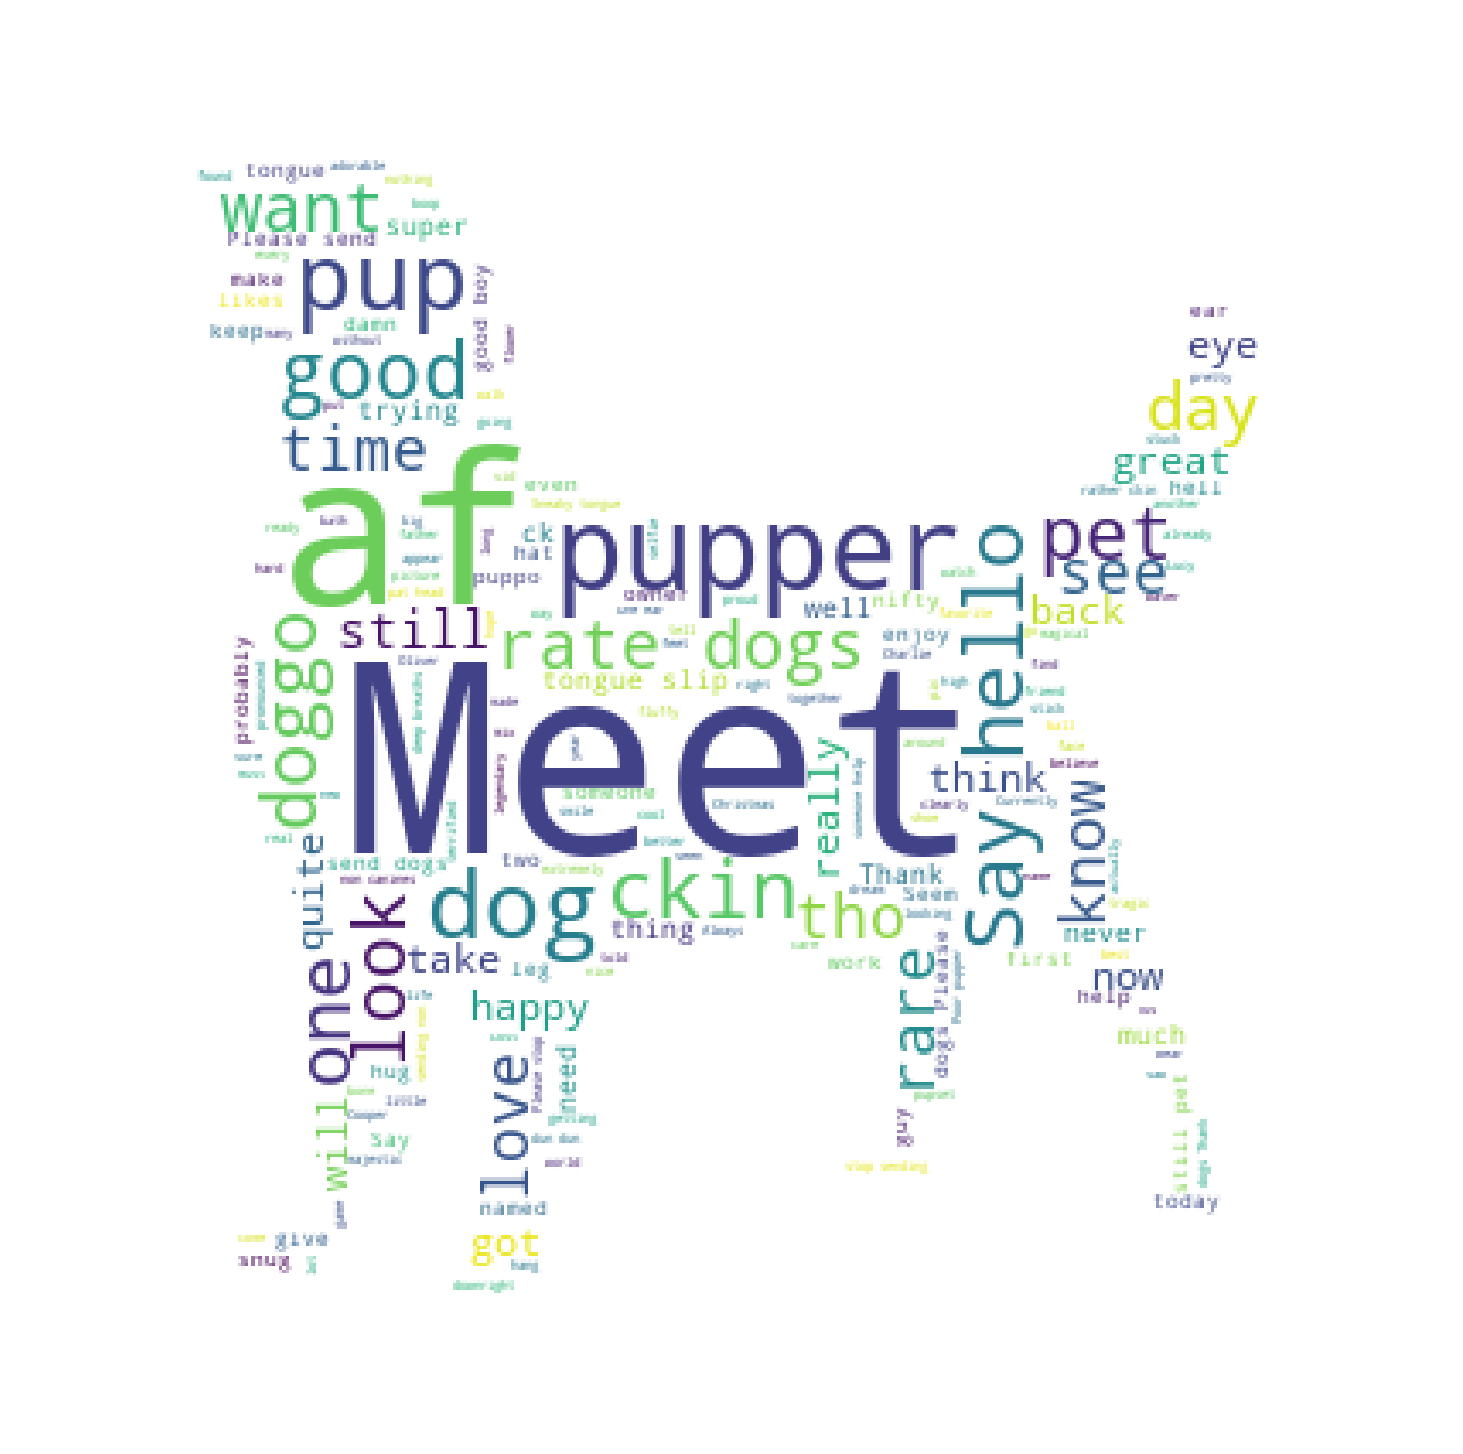

In [76]:
import urllib
#List of words in tweeted text
tweet_text = np.array(df.text)
word_list=[]
for text in tweet_text:
    word_list.append(text.replace('\n',""))

#reference the shape of the mask of the wordcloud
dog_mask = np.array(Image.open(requests.get('https://i.pinimg.com/564x/10/9d/3e/109d3ef593a32fa2baa00edc81af58b6.jpg',stream=True).raw))
    
#set stopwords to exclude from wordcloud
stopwords=set(STOPWORDS)
stopwords.add("https")
stopwords.add("co")
stopwords.add("amp")

#call wordcloud function. "Meet pupper," indeed.
generate_wordcloud(word_list, dog_mask, stopwords)


#Wordcloud instruction and examples followed from Andreas Mueller's page in GitHub
#https://amueller.github.io/word_cloud/

## Additional Sources

How to display notnull rows and columns in a Python dataframe?
- https://www.geeksforgeeks.org/how-to-display-notnull-rows-and-columns-in-a-python-dataframe/

How to drop one or multiple columns in Pandas Dataframe 
- https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/